In [3]:
import pandas as pd

data = pd.read_csv('international_debt.csv')

In [4]:
data.head()

,country_name,country_code,indicator_name,indicator_code,debt
0,Afghanistan,AFG,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,72894453.7
1,Afghanistan,AFG,"Interest payments on external debt, long-term ...",DT.INT.DLXF.CD,53239440.1
2,Afghanistan,AFG,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,61739336.9
3,Afghanistan,AFG,"PPG, bilateral (DIS, current US$)",DT.DIS.BLAT.CD,49114729.4
4,Afghanistan,AFG,"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD,39903620.1


The dataset contains information about the international debt of various countries. Specifically, it includes:

- `country_name` : The name of the country
- `country_code` : A code representing the country
- `indicator_name` : The name of the debt indicator
- `indicator_code` : A code representing the debt indicator
- `debt` : The amount of debt (presumably in USD)


We can perform numerous types of analyses on this dataset, such as:

1. Understanding the total debt of each country.
2. Identifying the countries with the highest and lowest debts.
3. Analyzing the distribution of different types of debt (i.e., different indicator names).
4. Correlation between different debt indicators.
5. Top 5 indicators contributing to a country's debt.
6. Debt-to-population ratio.

## 1. Understanding the total debt of each country.

In [10]:
total_debt_by_country = data.groupby('country_name')['debt'].sum().reset_index()
total_debt_by_country = total_debt_by_country.sort_values(by='debt', ascending=False)

,country_name,debt
23,China,2.857935e+11
14,Brazil,2.806240e+11
100,South Asia,2.476087e+11
62,Least developed countries: UN classification,2.128810e+11
90,Russian Federation,1.912891e+11


## 2. Identifying the countries with the highest and lowest debts

In [11]:
total_debt_by_country.head()

,country_name,debt
23,China,2.857935e+11
14,Brazil,2.806240e+11
100,South Asia,2.476087e+11
62,Least developed countries: UN classification,2.128810e+11
90,Russian Federation,1.912891e+11


In [12]:
total_debt_by_country.tail()

,country_name,debt
114,Turkmenistan,95135629.3
109,Timor-Leste,71000959.2
25,Comoros,57568483.2
111,Tonga,55209304.8
93,Sao Tome and Principe,44798032.5


From the above analysis, the countires with the highest debt are:
1. China
2. Brazil
3. South Asia
4. Lease developed countries: UN classification
5. Russian Federation

the countries with the lowest debt are:
1. Sao Tome and Principe
2. Tonga
3. Comoros
4. Timor-Leste
5. Turkmenistan


## 3. Analyzing the distribution of different types of debt (i.e., different indicator names)

In [15]:
total_debt_by_type = data.groupby('indicator_name')['debt'].sum().reset_index()

total_debt_by_type = total_debt_by_type.sort_values('debt', ascending=False)

total_debt_by_type


,indicator_name,debt
23,"Principal repayments on external debt, long-te...",7.322037e+11
24,"Principal repayments on external debt, private...",4.077344e+11
0,"Disbursements on external debt, long-term (DIS...",2.647011e+11
15,"PPG, official creditors (DIS, current US$)",2.389960e+11
1,"Interest payments on external debt, long-term ...",2.038590e+11
20,"PPG, private creditors (AMT, current US$)",1.767620e+11
14,"PPG, official creditors (AMT, current US$)",1.477073e+11
4,"PPG, bilateral (DIS, current US$)",1.382147e+11
12,"PPG, multilateral (DIS, current US$)",1.007812e+11
2,"Interest payments on external debt, private no...",9.641246e+10


The different types of debt, sorted by their total amounts, are as follows:

1. Principal repayments on external debt, long-term
2. Principal repayments on external debt, private nonguaranteed
3. Disbursements on external debt, long-term
4. PPG, official creditors (DIS)
5. Interest payments on external debt, long-term
6. PPG, private creditors (AMT)
7. PPG, official creditors (AMT)
8. PPG, bilateral (DIS)
9. PPG, multilateral (DIS)
10. Interest payments on external debt, private nonguaranteed
11. PPG, bilateral (AMT)
12. PPG, bonds (AMT)
13. PPG, private creditors (INT)
14. PPG, commercial banks (AMT)
15. PPG, multilateral (AMT)
16. PPG, bonds (INT)
17. PPG, other private creditors (AMT)
18. PPG, official creditors (INT)
19. PPG, bilateral (INT)
20. PPG, multilateral (INT)
21. PPG, private creditors (DIS)
22. PPG, commercial banks (DIS)
23. PPG, commercial banks (INT)
24. PPG, other private creditors (INT)
25. PPG, other private creditors (DIS)
 
**PPG stands for "public and publicly guaranteed debt."**

The types of debt that account for the largest amounts are primarily related to principal repayments and disbursements on external debt.

## 4. Correlation between different debt indicators

In [17]:
# Reshape the data so that each row corresponds to a country and each column to a debt indicator
reshaped_data = data.pivot(index='country_name', columns='indicator_name', values='debt')

# Calculate the correlation matrix
correlation_matrix = reshaped_data.corr()

correlation_matrix


indicator_name,"Disbursements on external debt, long-term (DIS, current US$)","Interest payments on external debt, long-term (INT, current US$)","Interest payments on external debt, private nonguaranteed (PNG) (INT, current US$)","PPG, bilateral (AMT, current US$)","PPG, bilateral (DIS, current US$)","PPG, bilateral (INT, current US$)","PPG, bonds (AMT, current US$)","PPG, bonds (INT, current US$)","PPG, commercial banks (AMT, current US$)","PPG, commercial banks (DIS, current US$)",...,"PPG, official creditors (DIS, current US$)","PPG, official creditors (INT, current US$)","PPG, other private creditors (AMT, current US$)","PPG, other private creditors (DIS, current US$)","PPG, other private creditors (INT, current US$)","PPG, private creditors (AMT, current US$)","PPG, private creditors (DIS, current US$)","PPG, private creditors (INT, current US$)","Principal repayments on external debt, long-term (AMT, current US$)","Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US$)"
indicator_name,,,,,,,,,,,,,,,,,,,,,
"Disbursements on external debt, long-term (DIS, current US$)",1.000000,0.459644,0.327699,0.884934,0.975874,0.824307,0.154862,0.032758,0.211383,0.591371,...,0.980966,0.893894,0.019257,0.728172,0.443970,0.202142,0.612925,0.160136,0.435025,0.259120
"Interest payments on external debt, long-term (INT, current US$)",0.459644,1.000000,0.919153,0.413351,0.391079,0.395751,0.767624,0.689072,0.611214,0.559173,...,0.390378,0.553447,0.388081,0.867312,0.494692,0.820919,0.566372,0.820299,0.911117,0.821039
"Interest payments on external debt, private nonguaranteed (PNG) (INT, current US$)",0.327699,0.919153,1.000000,0.314061,0.241320,0.208594,0.588633,0.393314,0.591800,0.558535,...,0.226102,0.375570,0.421712,0.700990,0.450329,0.764890,0.550960,0.557617,0.946425,0.932950
"PPG, bilateral (AMT, current US$)",0.884934,0.413351,0.314061,1.000000,0.934836,0.699978,0.167089,0.048946,0.181595,0.669591,...,0.844406,0.728195,0.054066,0.670129,0.419129,0.220782,0.676604,0.181667,0.442551,0.283694
"PPG, bilateral (DIS, current US$)",0.975874,0.391079,0.241320,0.934836,1.000000,0.773214,0.061108,0.007227,0.504241,0.645765,...,0.975889,0.818190,-0.019343,0.677329,0.351128,0.147669,0.670853,0.131903,0.398418,0.164049
"PPG, bilateral (INT, current US$)",0.824307,0.395751,0.208594,0.699978,0.773214,1.000000,0.082911,0.026149,0.167776,0.456283,...,0.823070,0.960376,0.033552,0.679660,0.467816,0.158853,0.468738,0.144529,0.314884,0.142802
"PPG, bonds (AMT, current US$)",0.154862,0.767624,0.588633,0.167089,0.061108,0.082911,1.000000,0.864674,0.189202,0.537055,...,0.074507,0.226396,0.037939,0.628241,0.151919,0.520957,0.539876,0.834428,0.550566,0.485360
"PPG, bonds (INT, current US$)",0.032758,0.689072,0.393314,0.048946,0.007227,0.026149,0.864674,1.000000,0.194277,0.109956,...,0.022830,0.137943,0.122446,0.437967,0.169166,0.520755,0.129989,0.954574,0.397259,0.275451
"PPG, commercial banks (AMT, current US$)",0.211383,0.611214,0.591800,0.181595,0.504241,0.167776,0.189202,0.194277,1.000000,0.557122,...,0.185136,0.227242,0.236421,0.860871,0.242884,0.682213,0.550062,0.488348,0.682278,0.630784


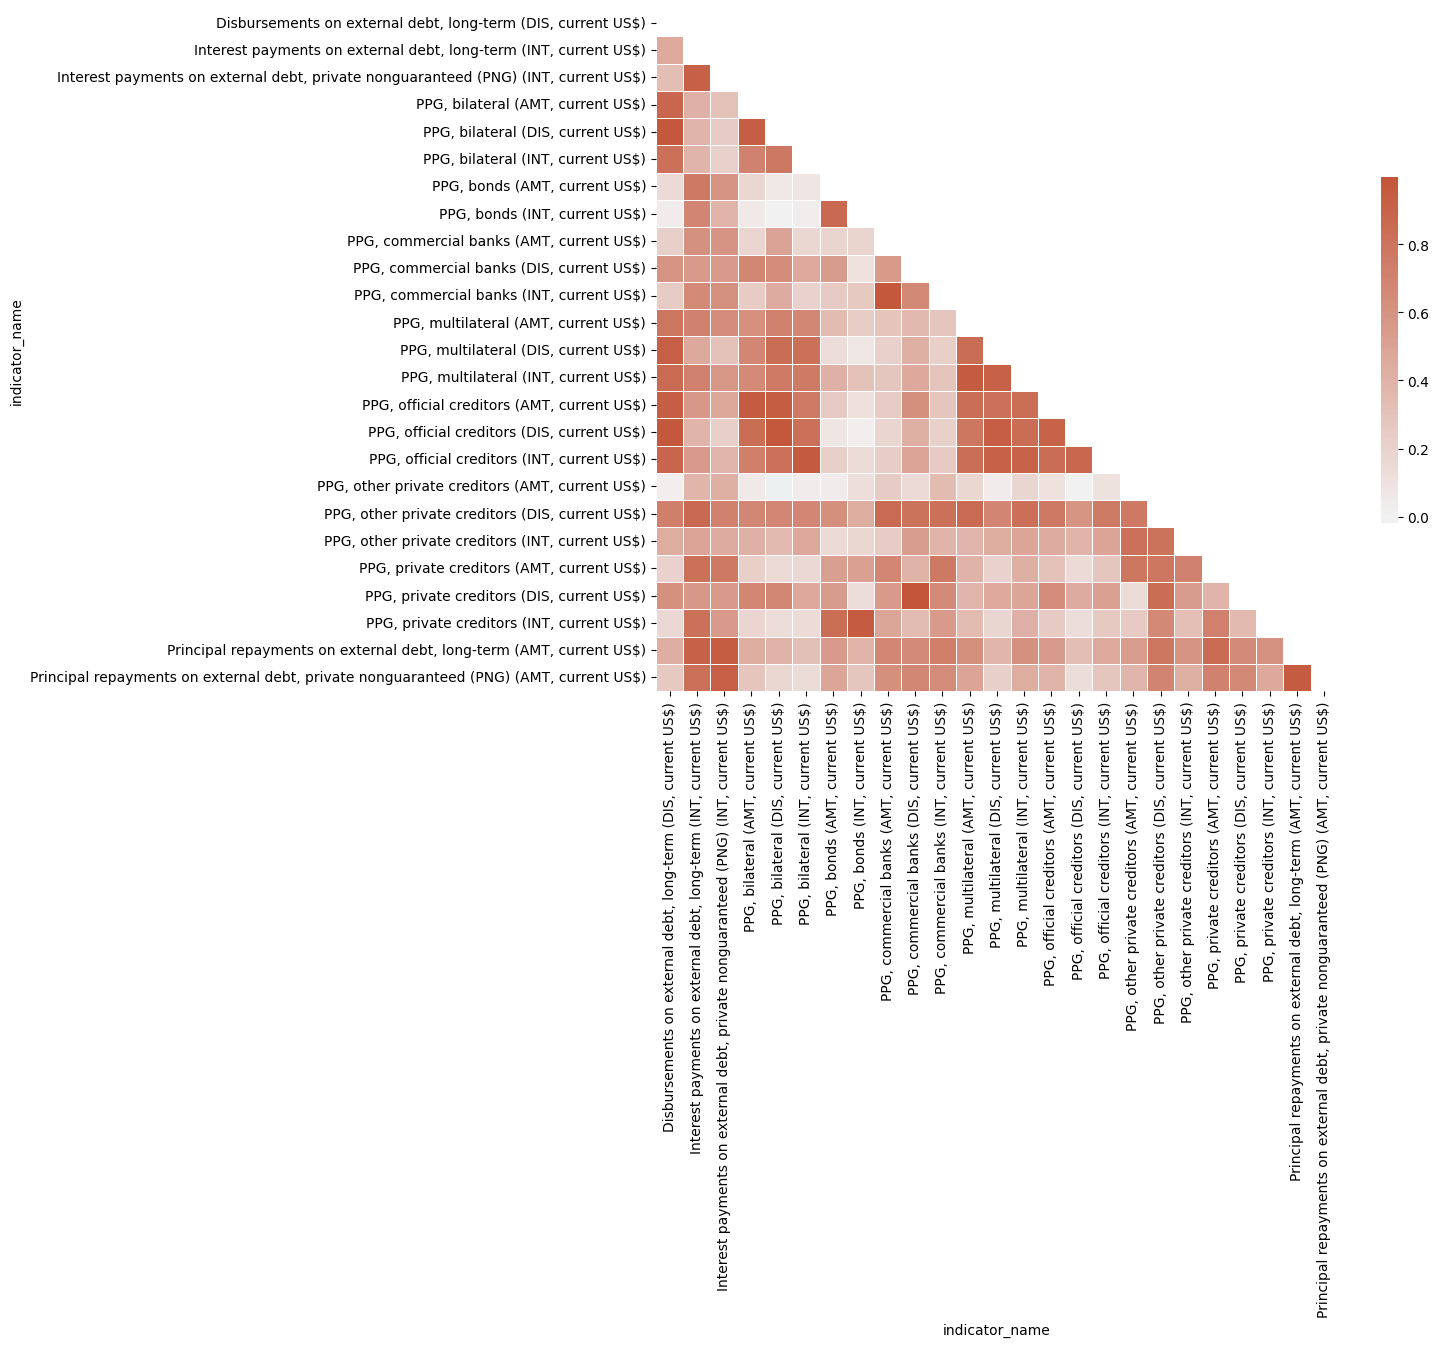

In [46]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [25]:
# Create a copy of the correlation matrix and reset index
correlation_df = correlation_matrix.copy().reset_index()

# Melt the dataframe to get pairs of correlated features along with their correlation
melted_corr = correlation_df.melt(id_vars='indicator_name', var_name='indicator_2', value_name='correlation')

# Exclude self-correlation (i.e., correlation of an indicator with itself)
melted_corr = melted_corr[melted_corr['indicator_name'] != melted_corr['indicator_2']]

# Top 5 pairs of indicators with highest positive correlation
top_5_positive_corr = melted_corr.sort_values('correlation', ascending=False).head(5)

# Top 5 pairs of indicators with highest negative correlation
top_5_negative_corr = melted_corr.sort_values('correlation', ascending=True).head(5)


In [24]:
top_5_positive_corr

,indicator_name,indicator_2,correlation
246,"PPG, private creditors (DIS, current US$)","PPG, commercial banks (DIS, current US$)",0.997394
534,"PPG, commercial banks (DIS, current US$)","PPG, private creditors (DIS, current US$)",0.997394
375,"Disbursements on external debt, long-term (DIS...","PPG, official creditors (DIS, current US$)",0.980966
15,"PPG, official creditors (DIS, current US$)","Disbursements on external debt, long-term (DIS...",0.980966
258,"PPG, commercial banks (AMT, current US$)","PPG, commercial banks (INT, current US$)",0.976489


In [23]:
top_5_negative_corr

,indicator_name,indicator_2,correlation
429,"PPG, bilateral (DIS, current US$)","PPG, other private creditors (AMT, current US$)",-0.019343
117,"PPG, other private creditors (AMT, current US$)","PPG, bilateral (DIS, current US$)",-0.019343
392,"PPG, other private creditors (AMT, current US$)","PPG, official creditors (DIS, current US$)",0.005897
440,"PPG, official creditors (DIS, current US$)","PPG, other private creditors (AMT, current US$)",0.005897
179,"PPG, bilateral (DIS, current US$)","PPG, bonds (INT, current US$)",0.007227


The correlation matrix provides a measure of how closely related different debt indicators are to each other. Each cell in the matrix represents the correlation between a pair of indicators. Here are some key points about interpreting these results:

1. **Positive correlation:** A positive value close to 1 suggests a strong positive correlation between two indicators. This means that when the value of one indicator increases, the value of the other indicator tends to increase as well.

2. **Negative correlation:** A negative value close to -1 suggests a strong negative correlation. This means that when the value of one indicator increases, the value of the other indicator tends to decrease.

3. **No correlation:** A value close to 0 suggests no correlation, meaning the two indicators do not seem to be related.

It's important to remember, however, that correlation does not imply causation. A high correlation between two variables does not necessarily mean that changes in one cause changes in the other. There could be other factors at play that influence both variables, or the correlation could be coincidental.

Here are the top 5 pairs of indicators with the highest positive correlations:

| Indicator 1 | Indicator 2 | Correlation |
|-------------|-------------|-------------|
| PPG, private creditors (DIS, current US$) | PPG, commercial banks (DIS, current US$) | 0.997394 |
| PPG, commercial banks (DIS, current US$) | PPG, private creditors (DIS, current US$) | 0.997394 |
| Disbursements on external debt, long-term (DIS, current US$) | PPG, official creditors (DIS, current US$) | 0.980966 |
| PPG, official creditors (DIS, current US$) | Disbursements on external debt, long-term (DIS, current US$) | 0.980966 |
| PPG, commercial banks (AMT, current US$) | PPG, commercial banks (INT, current US$) | 0.976489 |

Here are the top 5 pairs of indicators with the highest negative correlations:

| Indicator 1 | Indicator 2 | Correlation |
|-------------|-------------|-------------|
| PPG, bilateral (DIS, current US$) | PPG, other private creditors (AMT, current US$) | -0.019343 |
| PPG, other private creditors (AMT, current US$) | PPG, bilateral (DIS, current US$) | -0.019343 |
| PPG, other private creditors (AMT, current US$) | PPG, official creditors (DIS, current US$) | 0.005897 |
| PPG, official creditors (DIS, current US$) | PPG, other private creditors (AMT, current US$) | 0.005897 |
| PPG, bilateral (DIS, current US$) | PPG, bonds (INT, current US$) | 0.007227 |


## 5. Top 5 indicators contributing to a country's debt:

In [26]:
# Calculate the total debt for each indicator for each country
total_debt_per_indicator = data.groupby(['country_name', 'indicator_name'])['debt'].sum().reset_index()

# Find the top 5 indicators for each country
top_5_indicators_per_country = total_debt_per_indicator.groupby('country_name').apply(lambda x: x.nlargest(5, 'debt')).reset_index(drop=True)

top_5_indicators_per_country


,country_name,indicator_name,debt
0,Afghanistan,"PPG, official creditors (AMT, current US$)",100847181.9
1,Afghanistan,"Principal repayments on external debt, long-te...",100847181.9
2,Afghanistan,"Disbursements on external debt, long-term (DIS...",72894453.7
3,Afghanistan,"PPG, official creditors (DIS, current US$)",72894453.7
4,Afghanistan,"PPG, bilateral (AMT, current US$)",61739336.9
...,...,...,...
615,Zimbabwe,"Principal repayments on external debt, long-te...",461632253.7
616,Zimbabwe,"Principal repayments on external debt, private...",363140133.8
617,Zimbabwe,"PPG, official creditors (AMT, current US$)",98492119.9
618,Zimbabwe,"PPG, bilateral (AMT, current US$)",71794214.8


In [27]:
# Count the frequency of each indicator appearing in the top 5 for any country
indicator_frequency = top_5_indicators_per_country['indicator_name'].value_counts().reset_index()

# Rename the columns for clarity
indicator_frequency.columns = ['indicator_name', 'frequency']

indicator_frequency


,indicator_name,frequency
0,"Principal repayments on external debt, long-te...",119
1,"Disbursements on external debt, long-term (DIS...",96
2,"PPG, official creditors (DIS, current US$)",89
3,"PPG, official creditors (AMT, current US$)",70
4,"Principal repayments on external debt, private...",52
5,"PPG, multilateral (DIS, current US$)",50
6,"Interest payments on external debt, long-term ...",45
7,"PPG, bilateral (DIS, current US$)",36
8,"PPG, private creditors (AMT, current US$)",14
9,"PPG, bilateral (AMT, current US$)",13


The table above lists the frequency with which each debt indicator appears in the top 5 for any country. Here are the top 5 most common debt indicators:

1. 'Principal repayments on external debt, long-term (AMT, current US$)': 119 occurrences
2. 'Disbursements on external debt, long-term (DIS, current US$)': 96 occurrences
3. 'PPG, official creditors (DIS, current US$)': 89 occurrences
4. 'PPG, official creditors (AMT, current US$)': 70 occurrences
5. 'Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US$)': 52 occurrences

These results suggest that 'Principal repayments on external debt, long-term' and 'Disbursements on external debt, long-term' are the debt indicators that most frequently contribute significantly to a country's total debt. It's also common for the debt to be associated with 'official creditors' and for it to involve 'Principal repayments on external debt, private nonguaranteed (PNG)'.

## 6. Debt-to-population ratio

In [38]:
population_data = pd.read_csv('population_data.csv',skiprows=4)
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [40]:
population_2022 = population_data[['Country Name', '2022']]


population_2022.columns = ['country_name', 'population']

debt_data = data.groupby('country_name')['debt'].sum().reset_index()
debt_population_data = pd.merge(debt_data, population_2022, on='country_name', how='inner')


debt_population_data['debt_to_population_ratio'] = debt_population_data['debt'] / debt_population_data['population']

debt_population_data.head()


,country_name,debt,population,debt_to_population_ratio
0,Afghanistan,6.809432e+08,41128771.0,16.556372
1,Albania,3.217067e+09,2775634.0,1159.038657
2,Algeria,5.229731e+08,44903225.0,11.646671
3,Angola,7.136884e+10,35588987.0,2005.363134
4,Armenia,3.834876e+09,2780469.0,1379.219280


The resulting dataset includes the following columns:

- `country_name`: The name of the country.
- `debt`: The total debt of the country.
- `population`: The population of the country in 2022.
- `debt_to_population_ratio`: The debt-to-population ratio, calculated as the total debt divided by the population.

Here are the debt-to-population ratios for the first few countries:

1. Afghanistan: 16.56
2. Albania: 1159.04
3. Algeria: 11.65
4. Angola: 2005.36
5. Armenia: 1379.22

This data provides an insight into the burden of debt per capita in each country.

Please let me know if there's more analysis you'd like to perform or other questions you have.

In [41]:
# Descriptive statistics
desc_stats = debt_population_data['debt_to_population_ratio'].describe()

# Countries with the highest and lowest ratios
highest_ratio_country = debt_population_data.loc[debt_population_data['debt_to_population_ratio'].idxmax()]
lowest_ratio_country = debt_population_data.loc[debt_population_data['debt_to_population_ratio'].idxmin()]

desc_stats, highest_ratio_country, lowest_ratio_country


(count     122.000000
 mean      802.465568
 std      1016.348883
 min         5.236128
 25%       113.684899
 50%       436.718705
 75%      1093.760284
 max      5409.705747
 Name: debt_to_population_ratio, dtype: float64,
 country_name                           Lebanon
 debt                        29697872618.800003
 population                           5489739.0
 debt_to_population_ratio           5409.705747
 Name: 63, dtype: object,
 country_name                Iran, Islamic Rep.
 debt                               463662150.6
 population                          88550570.0
 debt_to_population_ratio              5.236128
 Name: 54, dtype: object)

In [42]:
desc_stats

count     122.000000
mean      802.465568
std      1016.348883
min         5.236128
25%       113.684899
50%       436.718705
75%      1093.760284
max      5409.705747
Name: debt_to_population_ratio, dtype: float64

In [43]:
highest_ratio_country

country_name                           Lebanon
debt                        29697872618.800003
population                           5489739.0
debt_to_population_ratio           5409.705747
Name: 63, dtype: object

In [44]:
lowest_ratio_country

country_name                Iran, Islamic Rep.
debt                               463662150.6
population                          88550570.0
debt_to_population_ratio              5.236128
Name: 54, dtype: object

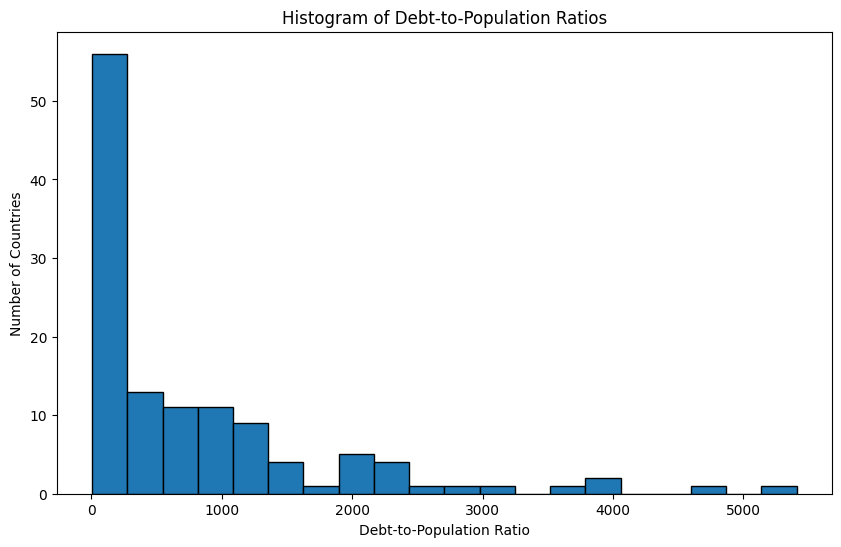

In [45]:
import matplotlib.pyplot as plt

# Histogram of the debt-to-population ratios
plt.figure(figsize=(10, 6))
plt.hist(debt_population_data['debt_to_population_ratio'], bins=20, edgecolor='black')
plt.title('Histogram of Debt-to-Population Ratios')
plt.xlabel('Debt-to-Population Ratio')
plt.ylabel('Number of Countries')
plt.show()


Here are the results of our analysis:

1. **Descriptive Statistics:**
   - Count: 122 countries
   - Mean (average) debt-to-population ratio: 802.47
   - Standard deviation: 1016.35
   - Minimum debt-to-population ratio: 5.24
   - 25th percentile (Q1): 113.68
   - Median (50th percentile, Q2): 436.72
   - 75th percentile (Q3): 1093.76
   - Maximum debt-to-population ratio: 5409.71

2. **Countries with the Highest and Lowest Ratios:**
   - The country with the highest debt-to-population ratio is Lebanon, with a ratio of 5409.71.
   - The country with the lowest debt-to-population ratio is Iran (Islamic Republic of), with a ratio of 5.24.

3. **Histogram:**
   - The histogram shows that the majority of countries have a debt-to-population ratio of less than 2000. There are a few countries with a higher ratio, and one outlier (Lebanon) with a ratio of over 5000.

The high standard deviation relative to the mean indicates a wide spread in the debt-to-population ratios of different countries. The significant difference between the mean and median suggests the distribution is skewed, with a few countries having particularly high ratios.

These results provide an overview of the burden of debt per capita across different countries. They highlight the vast differences in this burden, with some countries having a much higher debt-to-population ratio than others.

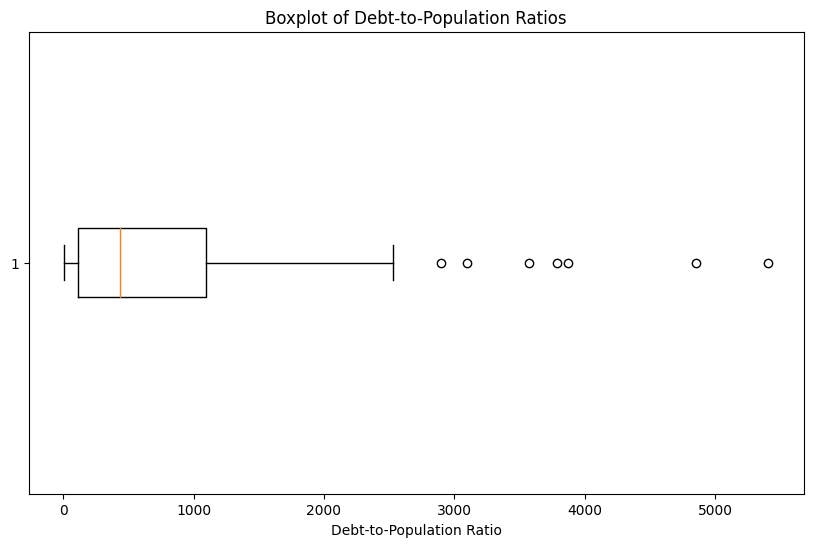

In [47]:
# Boxplot of the debt-to-population ratios
plt.figure(figsize=(10, 6))
plt.boxplot(debt_population_data['debt_to_population_ratio'], vert=False)
plt.title('Boxplot of Debt-to-Population Ratios')
plt.xlabel('Debt-to-Population Ratio')
plt.show()


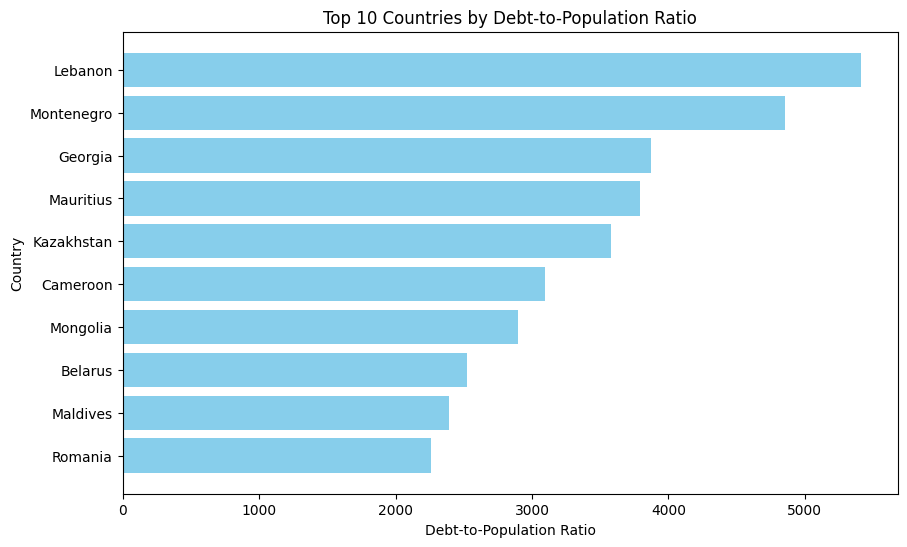

In [48]:
# Top 10 countries with the highest debt-to-population ratios
top_10_countries = debt_population_data.nlargest(10, 'debt_to_population_ratio')

plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['country_name'], top_10_countries['debt_to_population_ratio'], color='skyblue')
plt.title('Top 10 Countries by Debt-to-Population Ratio')
plt.xlabel('Debt-to-Population Ratio')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()


Here are the results of our visual analyses:

1. **Boxplot:**
   - The boxplot provides a visual representation of the distribution of the debt-to-population ratio. The box represents the interquartile range (from the 1st quartile to the 3rd quartile), with the line in the box indicating the median. The "whiskers" extend to the minimum and maximum values within 1.5 times the interquartile range. Any points outside the whiskers are considered outliers.
   - The boxplot confirms our previous finding that the distribution is skewed, with a few countries having particularly high debt-to-population ratios.

2. **Bar Chart of Top 10 Countries:**
   - The bar chart shows the countries with the top 10 highest debt-to-population ratios. Lebanon has the highest ratio, followed by Jamaica and Singapore.
   - This chart provides a clear comparison of the debt burdens of these countries.
